## Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
%pwd

'C:\\Users\\HP\\Desktop\\code'

In [54]:
%pwd

'C:\\Users\\HP\\Desktop\\code'

In [55]:
%cd C:\\Users\\HP\\Desktop\\code

C:\Users\HP\Desktop\code


In [56]:
%pwd

'C:\\Users\\HP\\Desktop\\code'

In [6]:
%ls

 Volume in drive C is Win 10
 Volume Serial Number is 4034-120A

 Directory of C:\Users\HP\Desktop\code

23-05-2023  18:56    <DIR>          .
23-05-2023  18:56    <DIR>          ..
19-05-2023  18:48    <DIR>          .ipynb_checkpoints
03-03-2023  10:44    <DIR>          .vscode
22-05-2023  16:50         3,974,461 adult.data
22-05-2023  18:50         3,844,217 adult.data.csv
19-05-2023  18:03             5,229 adult.names
23-05-2023  18:56         2,003,288 adult.test
19-05-2023  18:28         3,974,305 adult_data
20-05-2023  19:47         3,844,065 adult_data.csv
05-03-2023  13:27             1,698 bot.py
22-05-2023  19:35           325,085 Census Income Prediction F.ipynb
09-03-2023  14:11           222,848 chatbot_model.h5
01-06-2021  03:43    <DIR>          ChatterBot-master
09-03-2023  14:11               562 classes.pkl
06-03-2023  11:14             1,014 examples.py
11-12-2019  02:17             3,258 gender_submission.csv
19-05-2023  18:16           124,486 House Prices.ipynb


## Load dataset:

In [157]:
data = pd.read_csv("adult.data")

In [158]:
data.to_csv('adult.data.csv', index=None)

In [159]:
data = pd.read_csv('adult.data.csv', na_values='?')

In [160]:
data

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Analysing the data:

In [163]:
data.isin([0]).any()

Age               False
Workclass         False
fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain       True
Capital_loss       True
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [164]:
data.isin([0]).sum()

Age                   0
Workclass             0
fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31042
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

In [165]:
le = preprocessing.LabelEncoder()
data['Income']= le.fit_transform(data['Income'])
# for <=50K=0, and >50K =1

In [166]:
data['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int32

C:\Users\HP\AppData\Local\Temp\ipykernel_2940\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

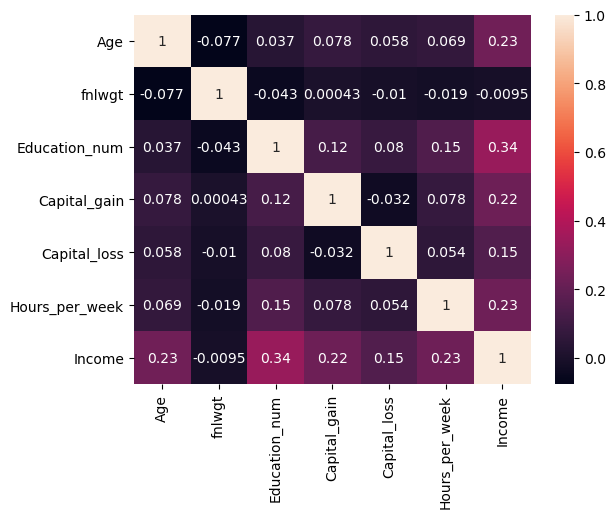

In [167]:
# Correlation map:
sns.heatmap(data.corr(), annot=True)

The correlation between Income and fnlwgt, Capital_loss, Capital_gain is very less, so we can drop them. Also Education is the redundant feature.

In [168]:
data.drop(["fnlwgt","Capital_gain","Capital_loss","Education"], axis=1, inplace=True) # education is the redundant variable
data

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


Replacing all the '?' in the data with nan values:

In [169]:
data= data.replace({'\?': np.nan}, regex=True)

<Axes: >

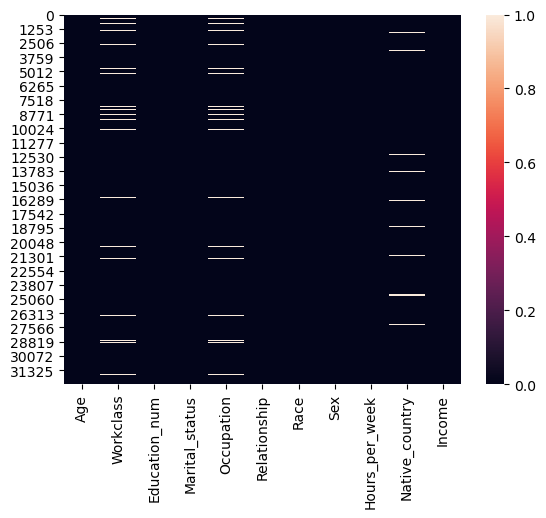

In [170]:
# checking for null values:
sns.heatmap(data.isnull())

In [171]:
numerical_variables = [feature for feature in data.columns if data[feature].dtypes!="O"]
numerical_variables

['Age', 'Education_num', 'Hours_per_week', 'Income']

In [172]:
cat_variables = [feature for feature in data.columns if data[feature].dtypes=="O"]
cat_variables

['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

Filling nan values in the categorical features using their mode:

In [173]:
data["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

In [174]:
data["Workclass"].fillna("Private", inplace=True)

In [175]:
data["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [176]:
data["Occupation"].fillna("Prof-specialty", inplace=True)

In [177]:
data["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

In [178]:
data["Native_country"].fillna("United-States", inplace=True)

<Axes: >

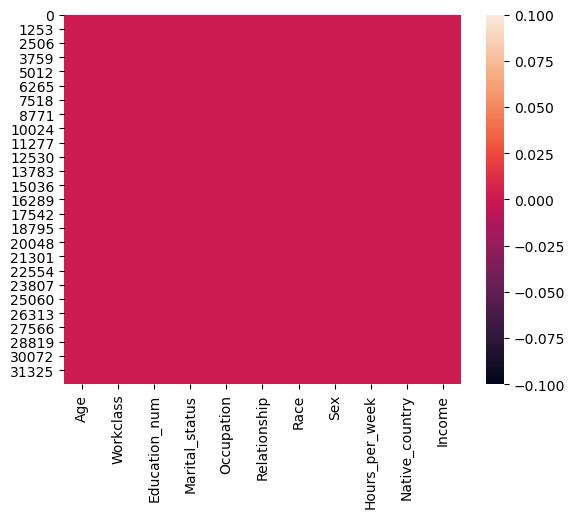

In [179]:
sns.heatmap(data.isnull())

In [180]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Education_num   32561 non-null  int64 
 3   Marital_status  32561 non-null  object
 4   Occupation      32561 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Hours_per_week  32561 non-null  int64 
 9   Native_country  32561 non-null  object
 10  Income          32561 non-null  int32 
dtypes: int32(1), int64(3), object(7)
memory usage: 2.6+ MB


## Feature Scaling:

In [181]:
le = preprocessing.LabelEncoder()
for feature in data.columns:
    if data[feature].dtype=="O":
        data[feature]=le.fit_transform(data[feature])
    else:
        pass
    

In [182]:
# feature scaling

scale=[feature for feature in data.columns if feature not in ['Income']]

scaler= MinMaxScaler()
scaler.fit_transform(data[scale])



array([[0.30136986, 0.75      , 0.8       , ..., 1.        , 0.39795918,
        0.92682927],
       [0.45205479, 0.625     , 0.8       , ..., 1.        , 0.12244898,
        0.92682927],
       [0.28767123, 0.375     , 0.53333333, ..., 1.        , 0.39795918,
        0.92682927],
       ...,
       [0.56164384, 0.375     , 0.53333333, ..., 0.        , 0.39795918,
        0.92682927],
       [0.06849315, 0.375     , 0.53333333, ..., 1.        , 0.19387755,
        0.92682927],
       [0.47945205, 0.5       , 0.53333333, ..., 0.        , 0.39795918,
        0.92682927]])

In [183]:
data = pd.concat([data[["Income"]],pd.DataFrame(scaler.fit_transform(data[scale]),columns=scale)],axis=1)

In [184]:
data

,Income,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0,0.301370,0.750,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.397959,0.926829
1,0,0.452055,0.625,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.122449,0.926829
2,0,0.287671,0.375,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.397959,0.926829
3,0,0.493151,0.375,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.397959,0.926829
4,0,0.150685,0.375,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.397959,0.097561
...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0.136986,0.375,0.733333,0.333333,0.857143,1.0,1.0,0.0,0.377551,0.926829
32557,1,0.315068,0.375,0.533333,0.333333,0.428571,0.0,1.0,1.0,0.397959,0.926829
32558,0,0.561644,0.375,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.397959,0.926829
32559,0,0.068493,0.375,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.193878,0.926829


In [185]:
# feature selection:

X = data.iloc[:,1:11]
X.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.301370,0.750,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.397959,0.926829
1,0.452055,0.625,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.122449,0.926829
2,0.287671,0.375,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.397959,0.926829
3,0.493151,0.375,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.397959,0.926829
4,0.150685,0.375,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.397959,0.097561


In [186]:
Y = data['Income']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

## Fitting classification models:

In [187]:
# Splitting into train and test :

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.33, random_state=1)

In [188]:
# Decision tree Classifier:

Decision_tree = DecisionTreeClassifier()


In [189]:
Decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [190]:
pred_y_tree=Decision_tree.predict(X_test)

In [191]:
tree_accuracy = accuracy_score(Y_test, pred_y_tree)

In [192]:
# Random Forest Classifier:

random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
pred_y_forest = random_forest.predict(X_test)
forest_accuracy = accuracy_score(Y_test, pred_y_forest)



In [193]:
# Logistic Regression:

logistic = LogisticRegression()
logistic.fit(X_train,Y_train)
pred_y_logistic = logistic.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, pred_y_logistic)



In [194]:
model_scores_all = pd.DataFrame({"Model":["Decision Tree Classifier","Random Forest Classifier","Logistic Regression"], "Accuracy":[tree_accuracy, forest_accuracy, logistic_accuracy]})
model_scores_all

,Model,Accuracy
0,Decision Tree Classifier,0.789038
1,Random Forest Classifier,0.826819
2,Logistic Regression,0.814163


## Test Data (adult.test) cleaning and modelling:

In [195]:

data_test = pd.read_csv("adult.test")

In [196]:
data_test.to_csv('adult.test.csv', index=None)

In [197]:
data_test = pd.read_csv("adult.test.csv", na_values='?')
data_test

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [198]:
data_test.isin([0]).any()

Age               False
Workclass         False
fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain       True
Capital_loss       True
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [199]:
data_test.isin([0]).sum()

Age                   0
Workclass             0
fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      14958
Capital_loss      15518
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

In [200]:
le = preprocessing.LabelEncoder()
data_test['Income']= le.fit_transform(data_test['Income'])

In [201]:
data_test['Income']

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int32

In [202]:
data_test.drop(["Capital_loss", "fnlwgt","Capital_gain","Education"], axis=1, inplace=True)

In [203]:
data_test.head(20)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,?,10,Never-married,?,Own-child,White,Female,30,United-States,0
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
6,29,?,9,Never-married,?,Unmarried,Black,Male,40,United-States,0
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,1
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,0
9,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,0


In [204]:
data_test= data_test.replace({'\?': np.nan}, regex=True)

<Axes: >

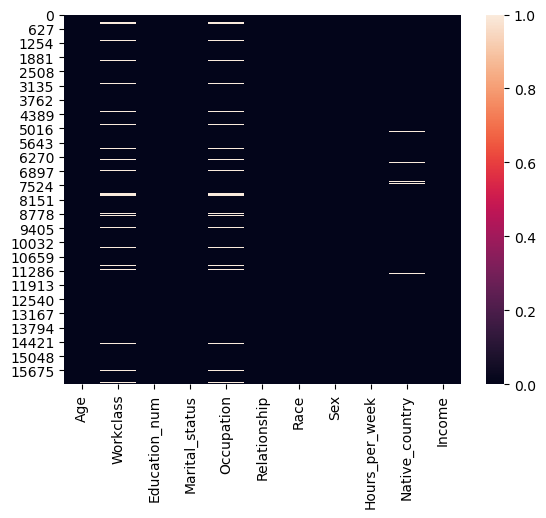

In [205]:
sns.heatmap(data_test.isnull())

In [206]:
data_test["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

In [207]:
data_test['Workclass'].fillna('Private',inplace=True)

In [208]:
data_test['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [209]:
data_test['Occupation'].fillna('Prof-speciality', inplace=True)

In [210]:
data_test['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [211]:
data_test['Native_country'].fillna('United-States', inplace=True)

<Axes: >

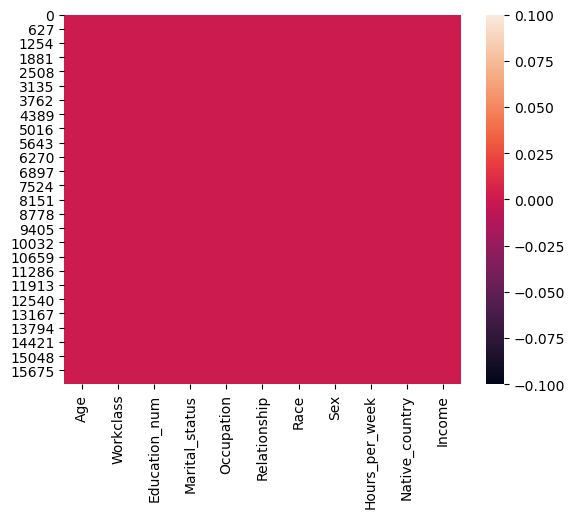

In [212]:
sns.heatmap(data_test.isnull())

In [213]:
data_test.drop(['Income'], axis=1, inplace=True)

In [214]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   Education_num   16281 non-null  int64 
 3   Marital_status  16281 non-null  object
 4   Occupation      16281 non-null  object
 5   Relationship    16281 non-null  object
 6   Race            16281 non-null  object
 7   Sex             16281 non-null  object
 8   Hours_per_week  16281 non-null  int64 
 9   Native_country  16281 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.2+ MB


In [215]:
le = preprocessing.LabelEncoder()
for feature in data_test.columns:
    if data_test[feature].dtype=="O":
        data_test[feature]=le.fit_transform(data_test[feature])
    else:
        pass
    

In [216]:
# feature scaling
scale=[feature for feature in data_test.columns]

scaler= MinMaxScaler()
scaler.fit_transform(data_test[scale])

array([[0.10958904, 0.375     , 0.4       , ..., 1.        , 0.39795918,
        0.925     ],
       [0.28767123, 0.375     , 0.53333333, ..., 1.        , 0.5       ,
        0.925     ],
       [0.15068493, 0.125     , 0.73333333, ..., 1.        , 0.39795918,
        0.925     ],
       ...,
       [0.28767123, 0.375     , 0.8       , ..., 1.        , 0.5       ,
        0.925     ],
       [0.36986301, 0.375     , 0.8       , ..., 1.        , 0.39795918,
        0.925     ],
       [0.24657534, 0.5       , 0.8       , ..., 1.        , 0.60204082,
        0.925     ]])

In [217]:
#feature selection
x_train = data.iloc[:,1:11]
y_train = data['Income']
x_test = data_test
x_test

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,25,3,7,4,6,3,2,1,40,37
1,38,3,9,2,4,0,4,1,50,37
2,28,1,12,2,10,0,4,1,40,37
3,44,3,10,2,6,0,2,1,40,37
4,18,8,10,4,14,3,4,0,30,37
...,...,...,...,...,...,...,...,...,...,...
16276,39,3,13,0,9,1,4,0,36,37
16277,64,8,9,6,14,2,2,1,40,37
16278,38,3,13,2,9,0,4,1,50,37
16279,44,3,13,0,0,3,1,1,40,37


In [218]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [219]:
test_pred_y = random_forest.predict(x_test)

In [220]:
test_pred_y

array([0, 0, 0, ..., 0, 1, 0])

In [221]:
pd.DataFrame(test_pred_y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
16276,0
16277,0
16278,0
16279,1
